# Convolutional Neural Networks (CNN)

Applying a kernal...

http://setosa.io/ev/image-kernels/

In [2]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2
from matplotlib import pyplot as plt

Applying a kernal to a matrix (convolution) will decrease the size of the image.  Applying a convolution is simply applying element wise multiplication, summing the results, and placing the sum at the center X,Y coordinate of the image.

Sometimes the decrease in image size is wanted, other times it is not.  **In most cases, you want your output image to remain the same size as your input image, so you must add padding**

There are different forms of ensuring our image stays the same size.  This is referred to as padding:

1. Replicate the pixels at the border of the image
2. Fill the space with 0's
3. Wrap around - border pixels are deteriend by examining the opposite side of the image

Replicate padding is the most common (and used when we care about aesthetics).  Zero padding is the most efficient.

# Create Convolve Function

In [3]:
def convolve(image, K):
    # grab the spatial dimensions of the image and the kernal
    (iH, iW) = image.shape[:2]
    (kH, kW) = K.shape[:2]
    
    # allocate memory for the output image, taking care to "pad"
    # the borders of the input image so the spatial size (i.e., 
    # width and height) are not reduced
    pad = (kW-1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float")
    
    # loop over the input image, "sliding" the kernal across
    # each (x,y) coordinate from left to right and top to bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            roi = image[y - pad:y + pad +1, x - pad:x + pad + 1]
            
            # perform the actual convolution by taking the
            # element-wise multiplication between the ROI and
            # the kernal, then summing the matrix
            k = (roi*K).sum()
            
            # store the convolved value inthe output (x, y)-
            # coordinate of the output image
            output[y-pad, x-pad] = k
            
            # rescale the output iamge to be in the range [0, 255]
            output = rescale_intensity(output, in_range=(0,255))
            output = (output*255).astype("uint8")
            
            # return the output image
            return output

# Argument Parser

In [7]:
# construct the argument prase and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="path to the input image")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

# Create Kernels

* SobelX - Used to find vertical edges
* SobelY - Used to find horizontal edges
* Laplacian - Used to detect edge like regions

The big idea here is that that CNN's are capable of learning which kernels to use and how to build them on top of eachother.


In [4]:
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7,7), dtype="float") * (1.0 / (7*7))
largeBlur = np.ones((21,21), dtype="float") * (1.0/ (21*21))

# construct a sharpening filter
sharpen = np.array(
    ([0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]),
    dtype="int")

# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array(
    ([0,1,0],
    [1,-4,1],
    [0,1,0]),
    dtype="int")

# construct the Sobel x-axis kernel
sobelX = np.array(
    ([-1,0,1],
     [-2,0,2],
     [-1,0,1]),
    dtype="int")

# construct the Sobel y-axis kernel
sobelY = np.array(
    ([-1,-2,11],
     [0,0,0],
     [1,2,1]),
    dtype="int")

# construct the emboss kernel
emboss = np.array(
    ([-2,-1,0],
     [-1,1,1],
     [0,1,2]),
    dtype="int")

# construct kernel bank
kernelBank = (
    ("small_blur", smallBlur),
    ("large_blur", largeBlur),
    ("sharpen", sharpen),
    ("laplacian", laplacian),
    ("sobel_x", sobelX),
    ("sobel_y", sobelY),
    ("emboss", emboss))

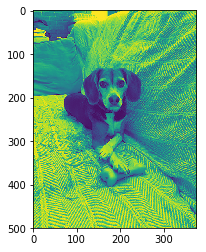

[INFO] applying small_blur kernel


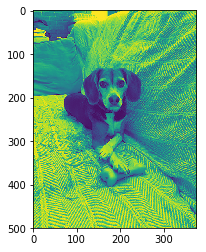

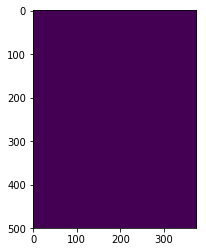

[INFO] applying large_blur kernel


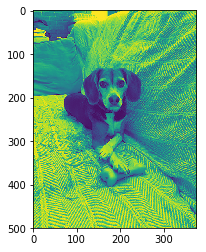

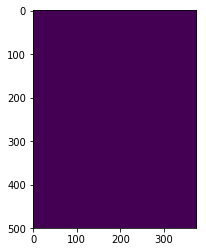

[INFO] applying sharpen kernel


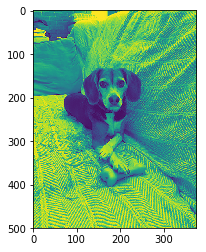

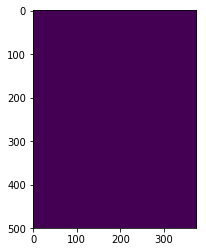

[INFO] applying laplacian kernel


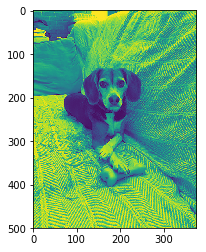

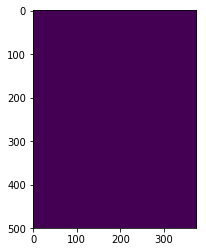

[INFO] applying sobel_x kernel


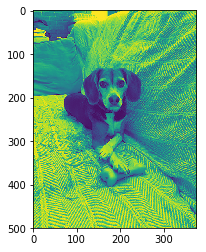

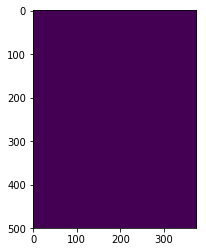

[INFO] applying sobel_y kernel


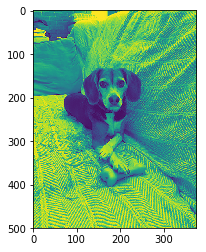

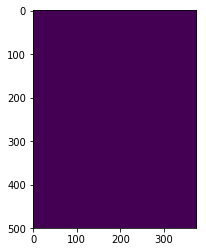

[INFO] applying emboss kernel


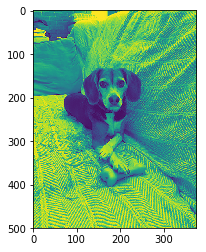

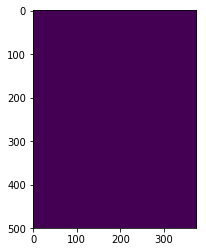

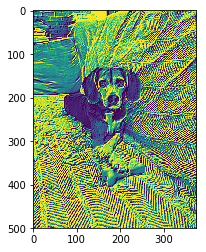

In [9]:
# load the input image and convert it to grayscale
#args['image'] = "images/jemma.png"
image = cv2.imread("images/jemma.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# loop over kernels
for (kernelName, K) in kernelBank:
    # apply the kernel to the grayscale image using both our custom
    # 'convolve' function and the OpenCV's 'filter2D function
    print("[INFO] applying {} kernel".format(kernelName))
    convolveOutput = convolve(gray, K)
    opencvOutput = cv2.filter2D(gray, -1, K)
    
    # show the output images if using matplotlib (jupyter caveat - colors show up weird)
    plt.imshow(gray)
    plt.show()
    plt.imshow(convolveOutput)
    plt.show()
    plt.imshow(opencvOutput)
    
    # show the output images if using terminal
    #cv2.imshow("Original", gray)
    #cv2.imshow("{} - convolve".format(kernelName), convolveOutput)
    #cv2.imshow("{} - opencv".format(kernaelName), opencvOutput)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    


# Layer Types

* Convolutional (CONV)
* Activation (ACT or RELU, where we use the same or the actual activation function) 
* Pooling (POOL)
* Fully-connected (FC)
* Batch normalization (BN)
* Dropout (DO)

Example CNN Model: INPUT => CONV => RELU => FC => SOFTMAX